In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('netflix.csv')
df.head(10)

,Cust_Id,Movie_Id,Rating,Date
0,1488844,1,3,2005-09-06
1,822109,1,5,2005-05-13
2,885013,1,4,2005-10-19
3,30878,1,4,2005-12-26
4,823519,1,3,2004-05-03
5,893988,1,3,2005-11-17
6,124105,1,4,2004-08-05
7,1248029,1,3,2004-04-22
8,1842128,1,4,2004-05-09
9,2238063,1,3,2005-05-11


In [26]:
def readFile(file_path, rows=100000):
    data_dict = {'Cust_Id' : [], 'Movie_Id' : [], 'Rating' : [], 'Date' : []}
    f = open(file_path, "r")
    count = 0
    for line in f:
        count += 1
        if count > rows:
            break
            
        if ':' in line:
            movidId = line[:-2] # remove the last character ':'
            movieId = int(movidId)
        else:
            customerID, rating, date = line.split(',')
            data_dict['Cust_Id'].append(customerID)
            data_dict['Movie_Id'].append(movieId)
            data_dict['Rating'].append(rating)
            data_dict['Date'].append(date.rstrip("\n"))
    f.close()
            
    return pd.DataFrame(data_dict)

In [27]:
df2 = readFile('combined_data_2.txt')
df3 = readFile('combined_data_3.txt')
df4 = readFile('combined_data_4.txt')

In [28]:
df = df.append(df2)
df = df.append(df3)
df = df.append(df4)

In [31]:
movie_title = pd.read_csv('netflix_movietitles.csv')
movie_title.head()

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [32]:
df.head()

,Cust_Id,Movie_Id,Rating,Date
0,1488844,1,3,2005-09-06
1,822109,1,5,2005-05-13
2,885013,1,4,2005-10-19
3,30878,1,4,2005-12-26
4,823519,1,3,2004-05-03


In [33]:
df_total = pd.merge(df, movie_title,on = 'Movie_Id')

In [34]:
df_total.head()

,Cust_Id,Movie_Id,Rating,Date,Year,Name
0,1488844,1,3,2005-09-06,2003.0,Dinosaur Planet
1,822109,1,5,2005-05-13,2003.0,Dinosaur Planet
2,885013,1,4,2005-10-19,2003.0,Dinosaur Planet
3,30878,1,4,2005-12-26,2003.0,Dinosaur Planet
4,823519,1,3,2004-05-03,2003.0,Dinosaur Planet


In [35]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399899 entries, 0 to 399898
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cust_Id   399899 non-null  object 
 1   Movie_Id  399899 non-null  int64  
 2   Rating    399899 non-null  object 
 3   Date      399899 non-null  object 
 4   Year      399899 non-null  float64
 5   Name      399899 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 21.4+ MB


In [39]:
df_total.Cust_Id = df_total.Cust_Id.astype('int')
df_total.Rating = df_total.Rating.astype('int')

<AxesSubplot:ylabel='Rating'>

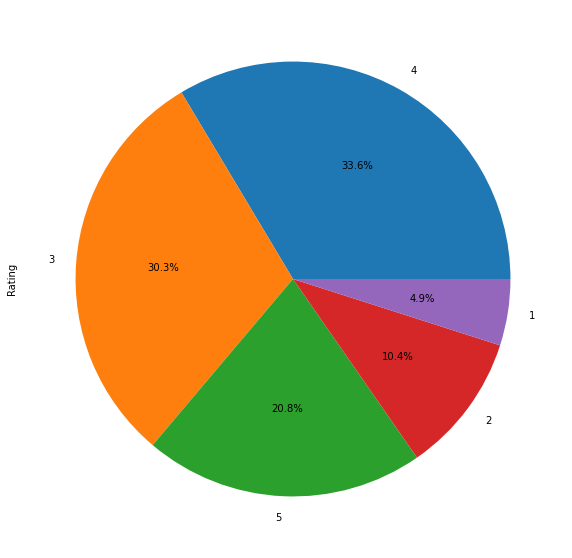

In [34]:
plt.figure(figsize=(18, 10))
df.Rating.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

In [40]:
df_total.groupby(['Movie_Id','Name'])['Rating'].mean()

Movie_Id  Name                         
1         Dinosaur Planet                  3.749543
2         Isle of Man TT 2004 Review       3.558621
3         Character                        3.641153
4         Paula Abdul's Get Up & Dance     2.739437
5         The Rise and Fall of ECW         3.919298
                                             ...   
13385     Dandelion Dead                   2.982609
13386     Reign: The Conqueror             3.311054
13387     Duran Duran: Sing Blue Silver    3.714859
13388     Breathless                       3.627710
13389     The World According to Garp      3.574012
Name: Rating, Length: 101, dtype: float64

In [44]:
avg_rating_eachMovie = df_total.groupby(['Movie_Id','Name'])['Rating'].mean()

In [85]:
a = np.rint(avg_rating_eachMovie.values)

In [94]:
np.unique(a, return_counts=True)

(array([2, 3, 4, 5]), array([ 8, 51, 41,  1], dtype=int64))

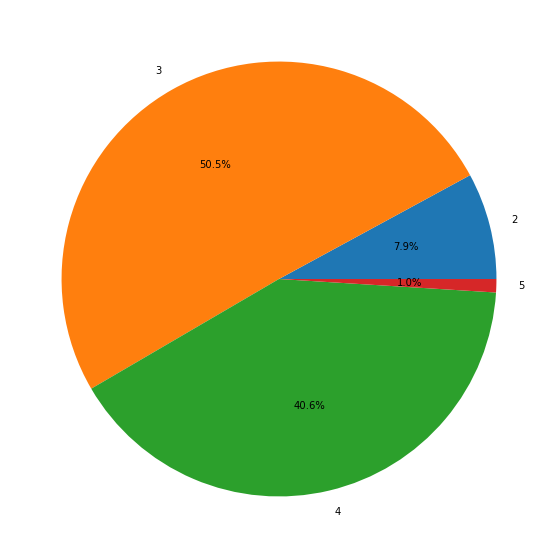

In [96]:
a = np.array([ 8, 51, 41,  1])
mylabels = ["2", "3", "4", "5"]
plt.figure(figsize=(18, 10))
plt.pie(a, labels= mylabels,autopct='%1.1f%%')
plt.show()

In [45]:
# avg rating over all movies
np.mean(avg_rating_eachMovie)

3.306735693668895

In [46]:
avg_rating_eachMovie.nlargest(10)

Movie_Id  Name                                                                       
13        Lord of the Rings: The Return of the King: Extended Edition: Bonus Material    4.552000
9236      South Park: Season 2                                                           4.095890
4509      Little House on the Prairie: Season 4                                          4.033784
25        Inspector Morse 31: Death Is Now My Neighbour                                  3.970174
4521      Wire in the Blood: Justice Painted Blind                                       3.965696
13380     Stray Dog                                                                      3.954955
4506      Breakfast at Tiffany's                                                         3.923898
5         The Rise and Fall of ECW                                                       3.919298
13378     His Girl Friday                                                                3.898387
13375     Andy Griffith Show: Cl

In [47]:
avg_rating_eachMovie.nsmallest(10)

Movie_Id  Name                        
7         8 Man                           2.129032
4502      Do You Wanna Know a Secret?     2.144231
22        Chump Change                    2.246305
4514      The Bushido Blade               2.358779
9211      Blue Juice                      2.369048
9214      Massage Your Mate               2.403846
9219      Full Clip                       2.415929
4505      Young Gods                      2.470588
9         Class of Nuke 'Em High 2        2.621053
13371     Chuck Norris: Private Lesson    2.669643
Name: Rating, dtype: float64

In [48]:
len(df_total['Rating'])

399899

In [50]:
print(df_total.nunique())

Cust_Id     172421
Movie_Id       101
Rating           5
Date          2158
Year            37
Name           101
dtype: int64


In [19]:
#df.to_csv('all_netflix.csv')

In [2]:
df = pd.read_csv('all_netflix.csv')
df.head()

,Unnamed: 0,Cust_Id,Movie_Id,Rating,Date
0,0,1488844,1,3,2005-09-06
1,1,822109,1,5,2005-05-13
2,2,885013,1,4,2005-10-19
3,3,30878,1,4,2005-12-26
4,4,823519,1,3,2004-05-03


In [3]:
df.isnull().sum()

Unnamed: 0    0
Cust_Id       0
Movie_Id      0
Rating        0
Date          0
dtype: int64

In [11]:
# create plots for time cost

y = [0.2,0.4,0.6,0.8]
time = [0.348,0.743,0.82,1.07]

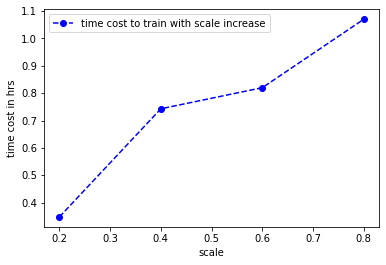

In [18]:
plt.plot(y,time, linestyle='--', marker='o', color='b', label='time cost to train with scale increase')
plt.ylabel("time cost in hrs")
plt.xlabel("scale")
plt.legend()

In [16]:
rmse = [1.5146,1.3406,1.2782,1.2168]

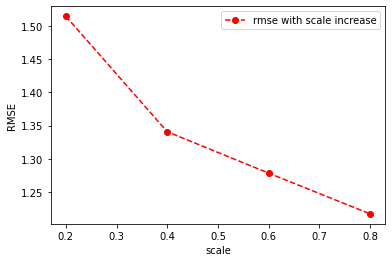

In [19]:
plt.plot(y,rmse, linestyle='--', marker='o', color='r', label='rmse with scale increase')
plt.ylabel("RMSE")
plt.xlabel("scale")
plt.legend()